In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# upload dataset and display 5 records from the dataset with all Columns
data = pd.read_csv('US_Accidents_March23.csv')
pd.set_option("display.max_columns", None)
data.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [7]:
# Remove columns with NAN values
data.drop(['End_Lat', 'End_Lng'], axis=1, inplace=True, errors='ignore')
data

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.010,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.010,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,CA,92501,US,US/Pacific,KRAL,2019-08-23 17:53:00,86.0,86.0,40.0,28.92,10.0,W,13.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,CA,92108,US,US/Pacific,KMYF,2019-08-23 18:53:00,70.0,70.0,73.0,29.39,10.0,SW,6.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,CA,92866,US,US/Pacific,KSNA,2019-08-23 18:53:00,73.0,73.0,64.0,29.74,10.0,SSW,10.0,0.00,Partly Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,Los Angeles,CA,90230,US,US/Pacific,KSMO,2019-08-23 18:51:00,71.0,71.0,81.0,29.62,10.0,SW,8.0,0.00,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
# display columns names
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County',
       'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
       'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
# display the core, index, columns, data types and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 44 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   Distance(mi)           float64
 8   Description            object 
 9   Street                 object 
 10  City                   object 
 11  County                 object 
 12  State                  object 
 13  Zipcode                object 
 14  Country                object 
 15  Timezone               object 
 16  Airport_Code           object 
 17  Weather_Timestamp      object 
 18  Temperature(F)         float64
 19  Wind_Chill(F)          float64
 20  Humidity(%)            float64
 21  Pressure(in)           float64
 22  Visibility(mi)    

In [10]:
# display the numbers of records and columns
# we have 7.7M records in our dataset
data.shape

(7728394, 44)

In [11]:
# checking for null values
#--0 means no null values in the columns
data.isnull().sum().sort_values(ascending=False)

Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Sunrise_Sunset             23246
Civil_Twilight             23246
Astronomical_Twilight      23246
Nautical_Twilight          23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
ID                             0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
End_Time                       0
Source                         0
Severity                       0
Start_Time                     0
County                         0
Amenity                        0
Country   

In [12]:
# Filling null values...
data["Visibility(mi)"].fillna(data["Visibility(mi)"].mean(),inplace=True)
data["Temperature(F)"].fillna(data["Temperature(F)"].mean(),inplace=True)
data["Pressure(in)"].fillna(data["Pressure(in)"].mean(),inplace=True)

C:\Users\tkhan\AppData\Local\Temp\ipykernel_5104\3066790637.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Visibility(mi)"].fillna(data["Visibility(mi)"].mean(),inplace=True)
C:\Users\tkhan\AppData\Local\Temp\ipykernel_5104\3066790637.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beha

In [13]:
# Checking for null values again
data.isnull().sum().sort_values(ascending=False)

Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Weather_Timestamp         120228
Sunrise_Sunset             23246
Nautical_Twilight          23246
Civil_Twilight             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
County                         0
Severity                       0
Start_Time                     0
ID                             0
Start_Lat                      0
Start_Lng                      0
Distance(mi)                   0
End_Time                       0
Source                         0
State                          0
Country                        0
Amenity                        0
Visibility(mi)                 0
Pressure(i

In [14]:
data.duplicated().sum() # check if any duplicate value is present

np.int64(0)

In [15]:
# changing datatype of the column End_Time to extract day,month,year and other details
data['End_Time']=data['End_Time'].str.replace(r'\.\d+','',regex=True) # Remove milliseconds from 'End_Time' column
# converting the string to datetime format
data['End_Time']=pd.to_datetime(data['End_Time'],format="%Y-%m-%d %H:%M:%S")
data["Year"]=data["End_Time"].dt.year
data['Month']=data['End_Time'].dt.month
data['Day']=data['End_Time'].dt.day
data['Hour']=data['End_Time'].dt.hour
data['Minute']=data['End_Time'].dt.minute
data['Second']=data['End_Time'].dt.second
data["Date"]=data["End_Time"].dt.date
data["Time"]=data["End_Time"].dt.time

In [16]:
# Combining Weather_Condition and Visibility columns...
data["w_v_combined"] = data["Visibility(mi)"].astype(str) + " " + data["Weather_Condition"]
data["w_v_combined"]

0             10.0 Light Rain
1             10.0 Light Rain
2               10.0 Overcast
3           9.0 Mostly Cloudy
4           6.0 Mostly Cloudy
                  ...        
7728389             10.0 Fair
7728390             10.0 Fair
7728391    10.0 Partly Cloudy
7728392             10.0 Fair
7728393              7.0 Fair
Name: w_v_combined, Length: 7728394, dtype: object

In [17]:
data.info() # checking for the data types again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 53 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             object        
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      object        
 18  Temperature(F)        

# UNIVARIATE ANALYSIS

In [18]:
# Summary statistics of the data
data.describe()

,Severity,End_Time,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Year,Month,Day,Hour,Minute,Second
count,7.728394e+06,7728394,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,5.729375e+06,7.554250e+06,7.728394e+06,7.728394e+06,7.157161e+06,5.524808e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06,7.728394e+06
mean,2.212384e+00,2020-06-04 11:47:48.023066880,3.620119e+01,-9.470255e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03,2.019909e+03,6.704709e+00,1.575033e+01,1.303476e+01,2.938971e+01,2.701282e+01
min,1.000000e+00,2016-02-08 06:37:08,2.455480e+01,-1.246238e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.016000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,2018-11-23 05:45:20.500000,3.339963e+01,-1.172194e+02,0.000000e+00,5.000000e+01,4.300000e+01,4.800000e+01,2.938000e+01,1.000000e+01,4.600000e+00,0.000000e+00,2.018000e+03,3.000000e+00,8.000000e+00,9.000000e+00,1.500000e+01,1.100000e+01
50%,2.000000e+00,2020-11-11 15:56:29,3.582397e+01,-8.776662e+01,3.000000e-02,6.300000e+01,6.200000e+01,6.700000e+01,2.985000e+01,1.000000e+01,7.000000e+00,0.000000e+00,2.020000e+03,7.000000e+00,1.600000e+01,1.400000e+01,2.900000e+01,2.800000e+01
75%,2.000000e+00,2022-01-20 17:44:40,4.008496e+01,-8.035368e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00,2.022000e+03,1.000000e+01,2.300000e+01,1.800000e+01,4.400000e+01,4.200000e+01
max,4.000000e+00,2023-03-31 23:59:00,4.900220e+01,-6.711317e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01,2.023000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,5.900000e+01
std,4.875313e-01,NaN,5.076079e+00,1.739176e+01,1.776811e+00,1.881102e+01,2.238983e+01,2.282097e+01,9.969900e-01,2.657336e+00,5.424983e+00,1.102246e-01,1.915277e+00,3.641722e+00,8.686556e+00,5.822901e+00,1.730044e+01,1.812925e+01


C:\Users\tkhan\AppData\Local\Temp\ipykernel_5104\1630386656.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=row_data_sources.index,y=row_data_sources,palette="viridis")


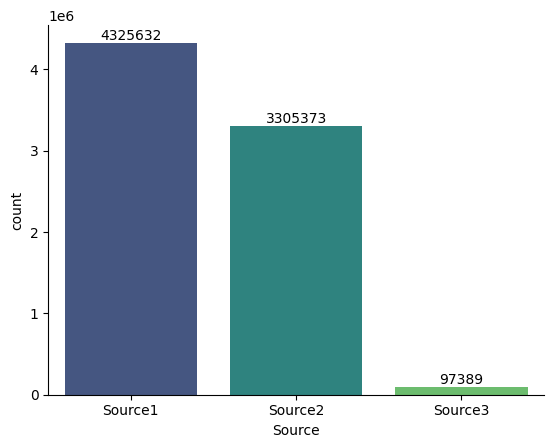

In [19]:
# Row accident data from different sources
row_data_sources=data.Source.value_counts()
sns.barplot(x=row_data_sources.index,y=row_data_sources,palette="viridis")
sns.despine(right=True)
for i,v in enumerate(row_data_sources):
    plt.text(i,v+1,str(v),ha="center",va="bottom")

In [20]:
unique_values = data['State'].unique()
unique_values

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'NC', 'AZ', 'TN', 'LA',
       'MN', 'CO', 'OK', 'NV', 'UT', 'KS', 'NM', 'AR', 'MS', 'ME', 'VT',
       'WY', 'ID', 'ND', 'MT', 'SD'], dtype=object)

In [21]:
# Top States with highest number of accidents
Stateswise_Occurence_counts = data['State'].value_counts()
Stateswise_Occurence_counts

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
LA     149701
NJ     140719
MD     140417
OH     118115
WA     108221
AL     101044
UT      97079
CO      90885
OK      83647
MO      77323
CT      71005
IN      67224
MA      61996
WI      34688
KY      32254
NE      28870
MT      28496
IA      26307
AR      22780
NV      21665
KS      20992
DC      18630
RI      16971
MS      15181
DE      14097
WV      13793
ID      11376
NM      10325
NH      10213
WY       3757
ND       3487
ME       2698
VT        926
SD        289
Name: count, dtype: int64

In [22]:
# Top States with highest number of accidents
Stateswise_Occurence_counts = data['State'].value_counts().head(15)
Stateswise_Occurence_counts

State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
AZ     170609
GA     169234
IL     168958
TN     167388
MI     162191
Name: count, dtype: int64

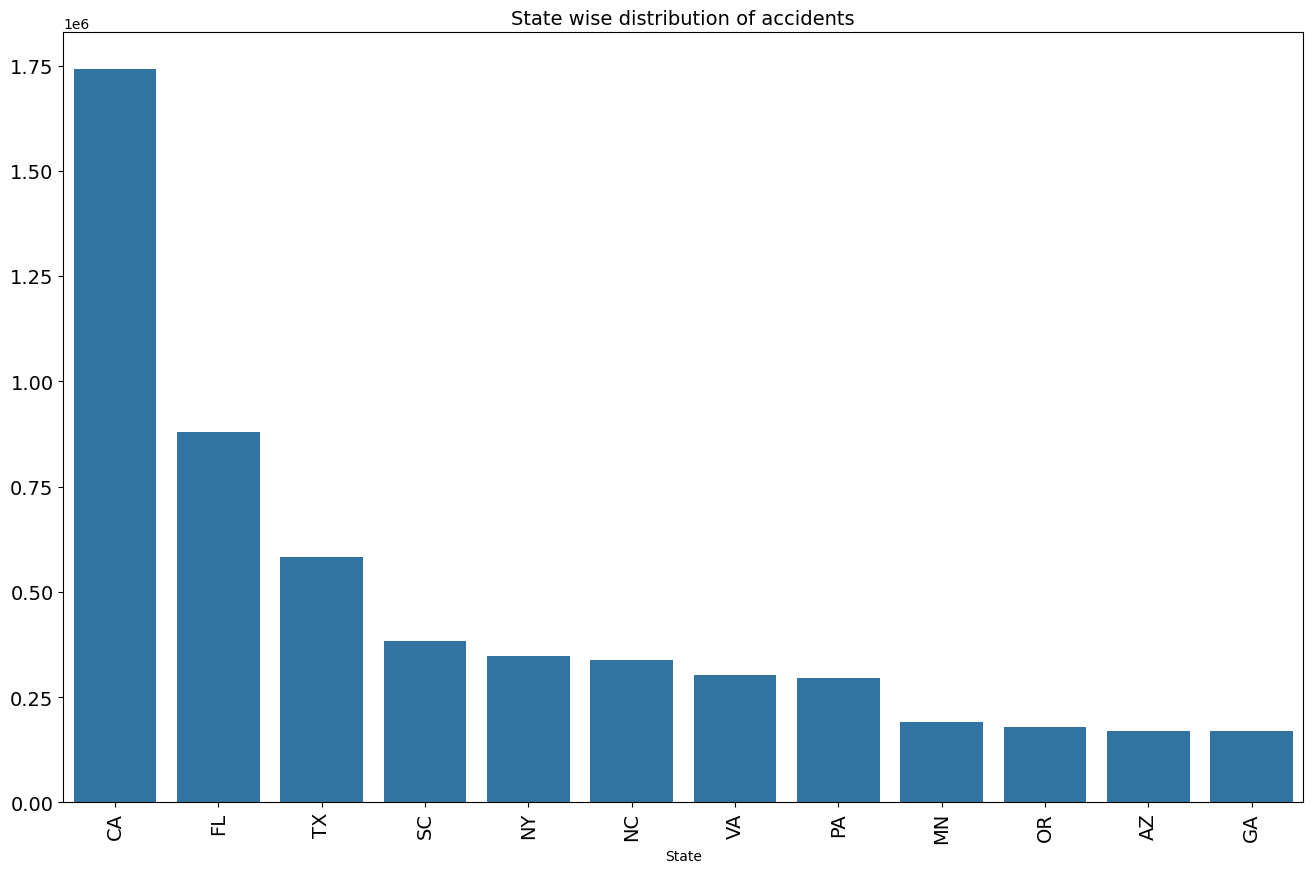

In [23]:
# State wise distribution of accidents
plt.figure(figsize=(16,10))
sns.countplot(data=data,x=data.State,order=['CA','FL','TX','SC','NY','NC','VA','PA','MN','OR','AZ','GA'])
plt.xticks(rotation=90,size=14)
plt.yticks(size=14)
plt.ylabel(None)
plt.title("State wise distribution of accidents",fontsize=14)
plt.show()

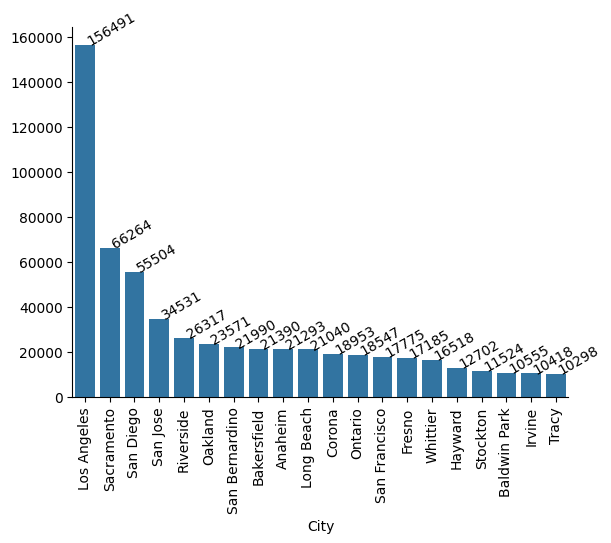

In [24]:
# Top 20 hotspots cities of accidents in california(CA)
CA_data=data[data["State"]=="CA"]
CA_City=CA_data.groupby("City")["City"].count().sort_values(ascending=False).head(20)
sns.barplot(x=CA_City.index,y=CA_City)
sns.despine(right=True) # Remove the right spine (border) for a cleaner plot appearance
for i,v in enumerate(CA_City):
    plt.text(i,v+1,str(v),rotation=30)
plt.xticks(rotation=90)
plt.ylabel(None)
plt.show()

In [25]:
# Top cities with highest number of accidents
city_data=data.groupby("City")["City"].count().sort_values(ascending=False).head(20)
city_data

City
Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

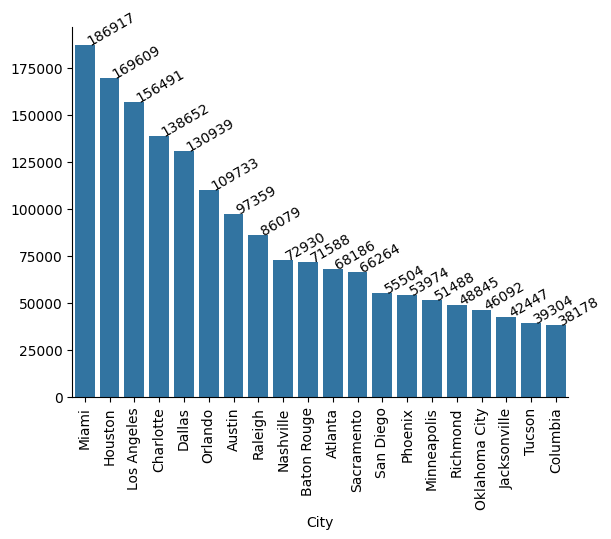

In [26]:
sns.barplot(x=city_data.index,y=city_data)
sns.despine(right=True) # Remove the right spine (border) for a cleaner plot appearance
for i,v in enumerate(city_data):
    plt.text(i,v+1,str(v),rotation=30)
plt.xticks(rotation=90)
plt.ylabel(None)
plt.show()

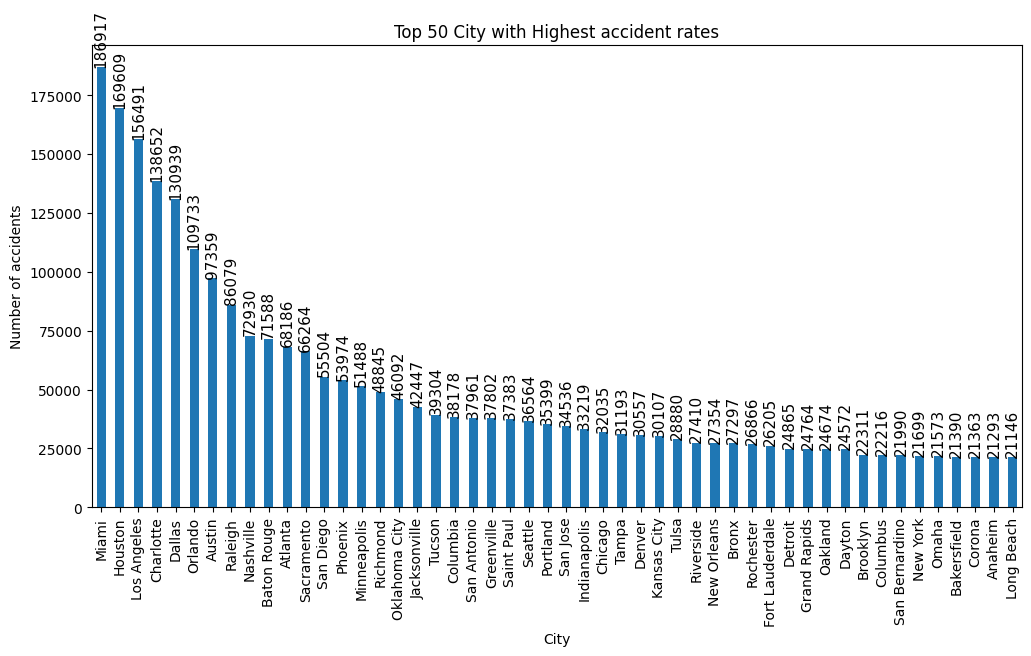

In [27]:
# Top 50 cities with Highest accident rates
plt.figure(figsize=(12,6))
city_wise_groupd=data.groupby("City")["City"].count().sort_values(ascending=False).head(50)
city_wise_groupd.plot(kind="bar")
for i,v in enumerate(city_wise_groupd):
    plt.text(i,v+1,str(v),ha="center",va="bottom",rotation=90,size=11)
plt.ylabel("Number of accidents")
plt.xlabel("City")
plt.title("Top 50 City with Highest accident rates")
plt.xticks(rotation=90)
plt.show()

C:\Users\tkhan\AppData\Local\Temp\ipykernel_5104\925404415.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=year_data.index,y=year_data,palette="rocket")


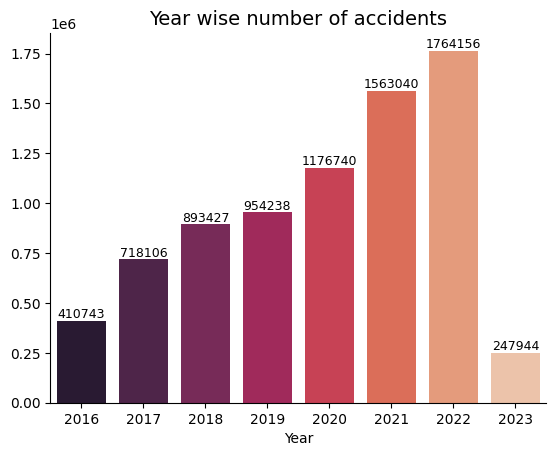

In [28]:
# Year wise number of accidents...
year_data=data.groupby("Year")["ID"].count()
sns.barplot(x=year_data.index,y=year_data,palette="rocket")
sns.despine(right=True)
for i,v in enumerate(year_data):
    plt.text(i,v+1,str(v),ha="center",va="bottom",size=9)
plt.ylabel(None)
plt.title("Year wise number of accidents",size=14)
plt.show()

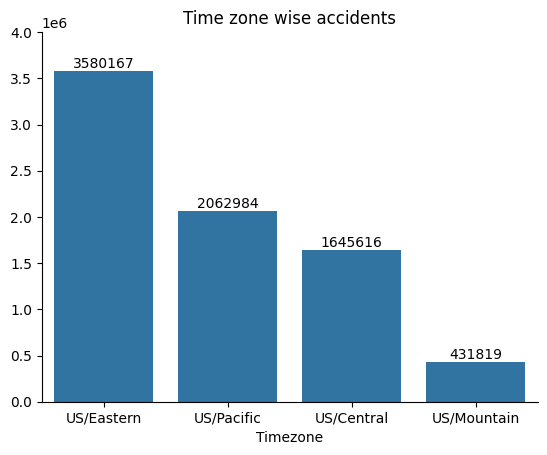

In [29]:
# Time zone wise accidents
nm=data.groupby("Timezone")["Timezone"].count().sort_values(ascending=False)
sns.barplot(x=nm.index,y=nm)
sns.despine(right=True)
plt.ylabel(None)
plt.title("Time zone wise accidents")
plt.ylim([0,4000000])
for i,v in enumerate(nm):
    plt.text(i,v+1,str(v),ha="center",va="bottom")

C:\Users\tkhan\AppData\Local\Temp\ipykernel_5104\1167747940.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=wind_dir.index,x=wind_dir,palette="rocket")


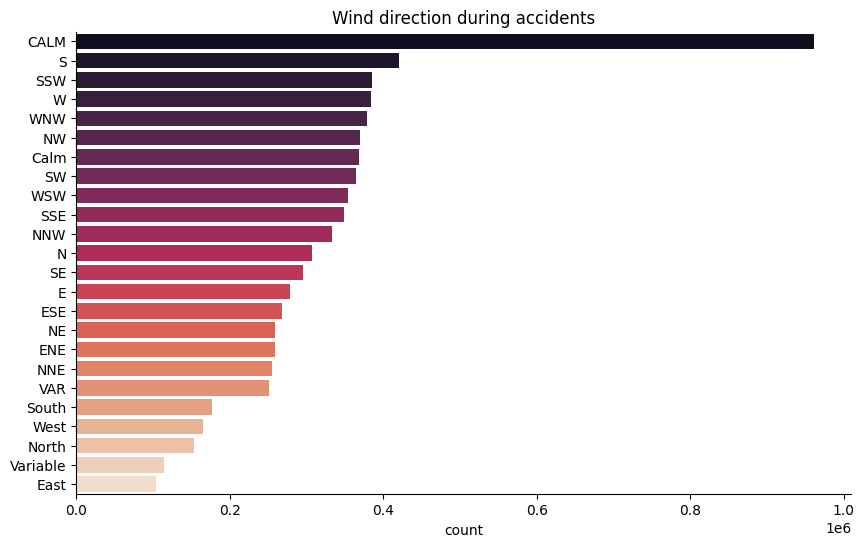

In [30]:
# Wind direction wise distribution of the accidents
plt.figure(figsize=(10,6))
wind_dir=data.Wind_Direction.value_counts().sort_values(ascending=False)
sns.barplot(y=wind_dir.index,x=wind_dir,palette="rocket")
sns.despine(right=True)
plt.ylabel(None)
plt.title("Wind direction during accidents")
plt.show()

Crossing
False    6854631
True      873763
Name: Crossing, dtype: int64


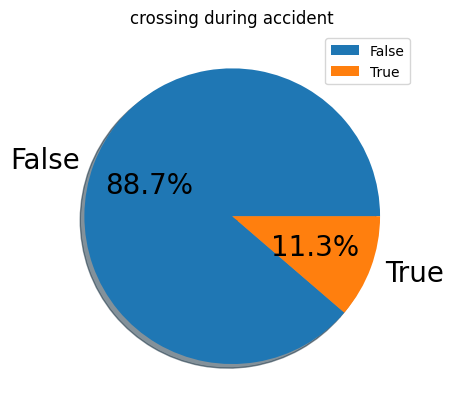

In [31]:
# crossing data distribution
crossing=data.groupby("Crossing")["Crossing"].count()
print(crossing)
plt.pie(crossing,labels=crossing.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":20})
plt.title("crossing during accident")
plt.legend()
plt.show()

Junction
False    7157052
True      571342
Name: Junction, dtype: int64


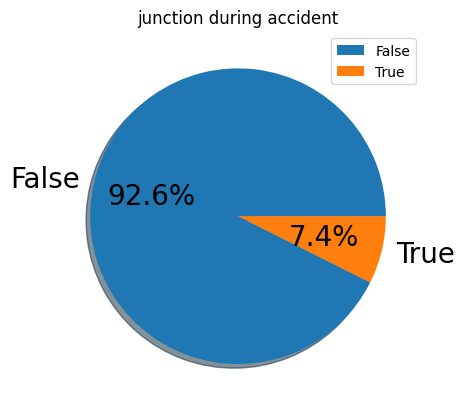

In [32]:
# juntion data distribution
junction=data.groupby("Junction")["Junction"].count()
print(junction)
plt.pie(junction,labels=junction.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":20})
plt.title("junction during accident")
plt.legend()
plt.show()

Station
False    7526493
True      201901
Name: Station, dtype: int64


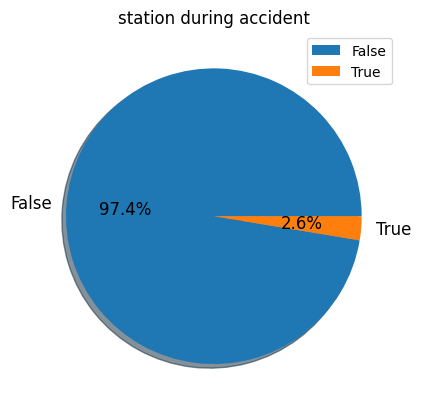

In [33]:
# station data distribution
station=data.groupby("Station")["Station"].count()
print(station)
plt.pie(station,labels=station.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":12})
plt.title("station during accident")
plt.legend()
plt.show()

Sunrise_Sunset
Day      5334553
Night    2370595
Name: count, dtype: int64


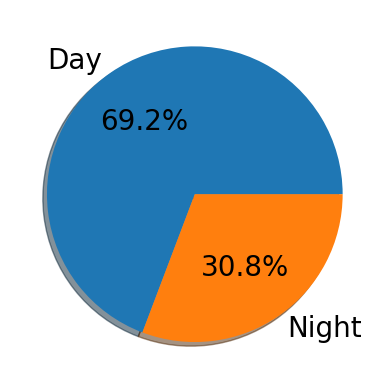

In [34]:
# Accidents day vs night
day_night=data.Sunrise_Sunset.value_counts()
print(day_night)
plt.pie(day_night,labels=day_night.index,autopct="%1.1f%%",shadow=True,textprops={"color":"black","size":20})
plt.show()

Severity
1      67366
2    6156981
3    1299337
4     204710
Name: Severity, dtype: int64


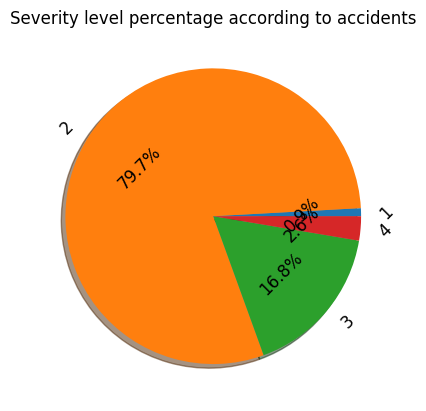

In [35]:
# Percentage of severity levels according to accidents
severity_per=data.groupby("Severity")["Severity"].count()
print(severity_per)
plt.pie(severity_per,labels=severity_per.index,autopct="%1.1f%%",shadow=True,textprops={"size":12,"rotation":45})
plt.title("Severity level percentage according to accidents")
plt.show()

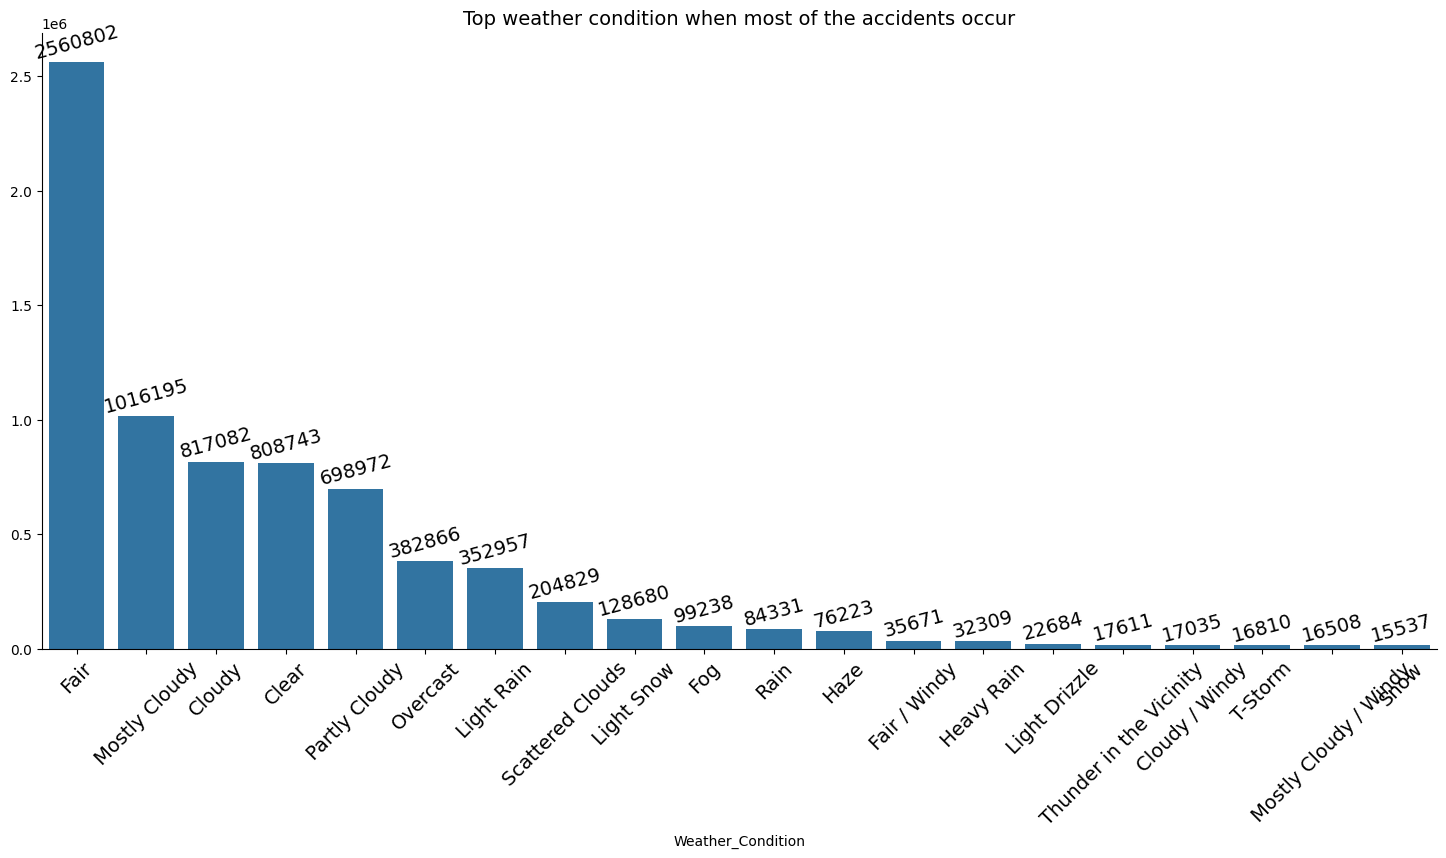

In [36]:
# Top weather condition when most of the accidents occure
plt.figure(figsize=(18,8))
weather_cond=data.groupby("Weather_Condition")["Weather_Condition"].count().sort_values(ascending=False).head(20)
sns.barplot(x=weather_cond.index,y=weather_cond)
sns.despine(right=True)
for i,v in enumerate(weather_cond):
    plt.text(i,v+1,str(v),ha="center",va="bottom",size=14,rotation=15)
plt.xticks(rotation=45,size=14)
plt.ylabel(None)
plt.title("Top weather condition when most of the accidents occur",fontsize=14)
plt.show()

Railway
False    7661415
True       66979
Name: Railway, dtype: int64


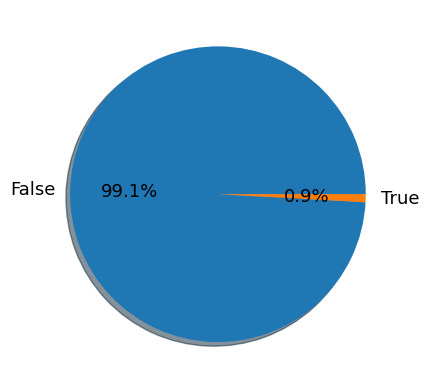

In [37]:
# Railway data distribution
railway=data.groupby("Railway")["Railway"].count()
print(railway)
plt.pie(railway,labels=railway.index,autopct="%1.1f%%",shadow=True,textprops={"size":13})
plt.show()

In [38]:
# average accidents on daily basis
date_wise=data.groupby("Date")["ID"].count()
date_wise.mean()

np.float64(2967.8932411674346)

In [39]:
# average accidents per year
year_data=data.groupby("Year")["ID"].count()
avg_acc=year_data.mean()
print(year_data)
print("average accidents per year: ",f'\033[1m{avg_acc}')

Year
2016     410743
2017     718106
2018     893427
2019     954238
2020    1176740
2021    1563040
2022    1764156
2023     247944
Name: ID, dtype: int64
average accidents per year:  966049.25


# BIVARIATE ANALYSIS

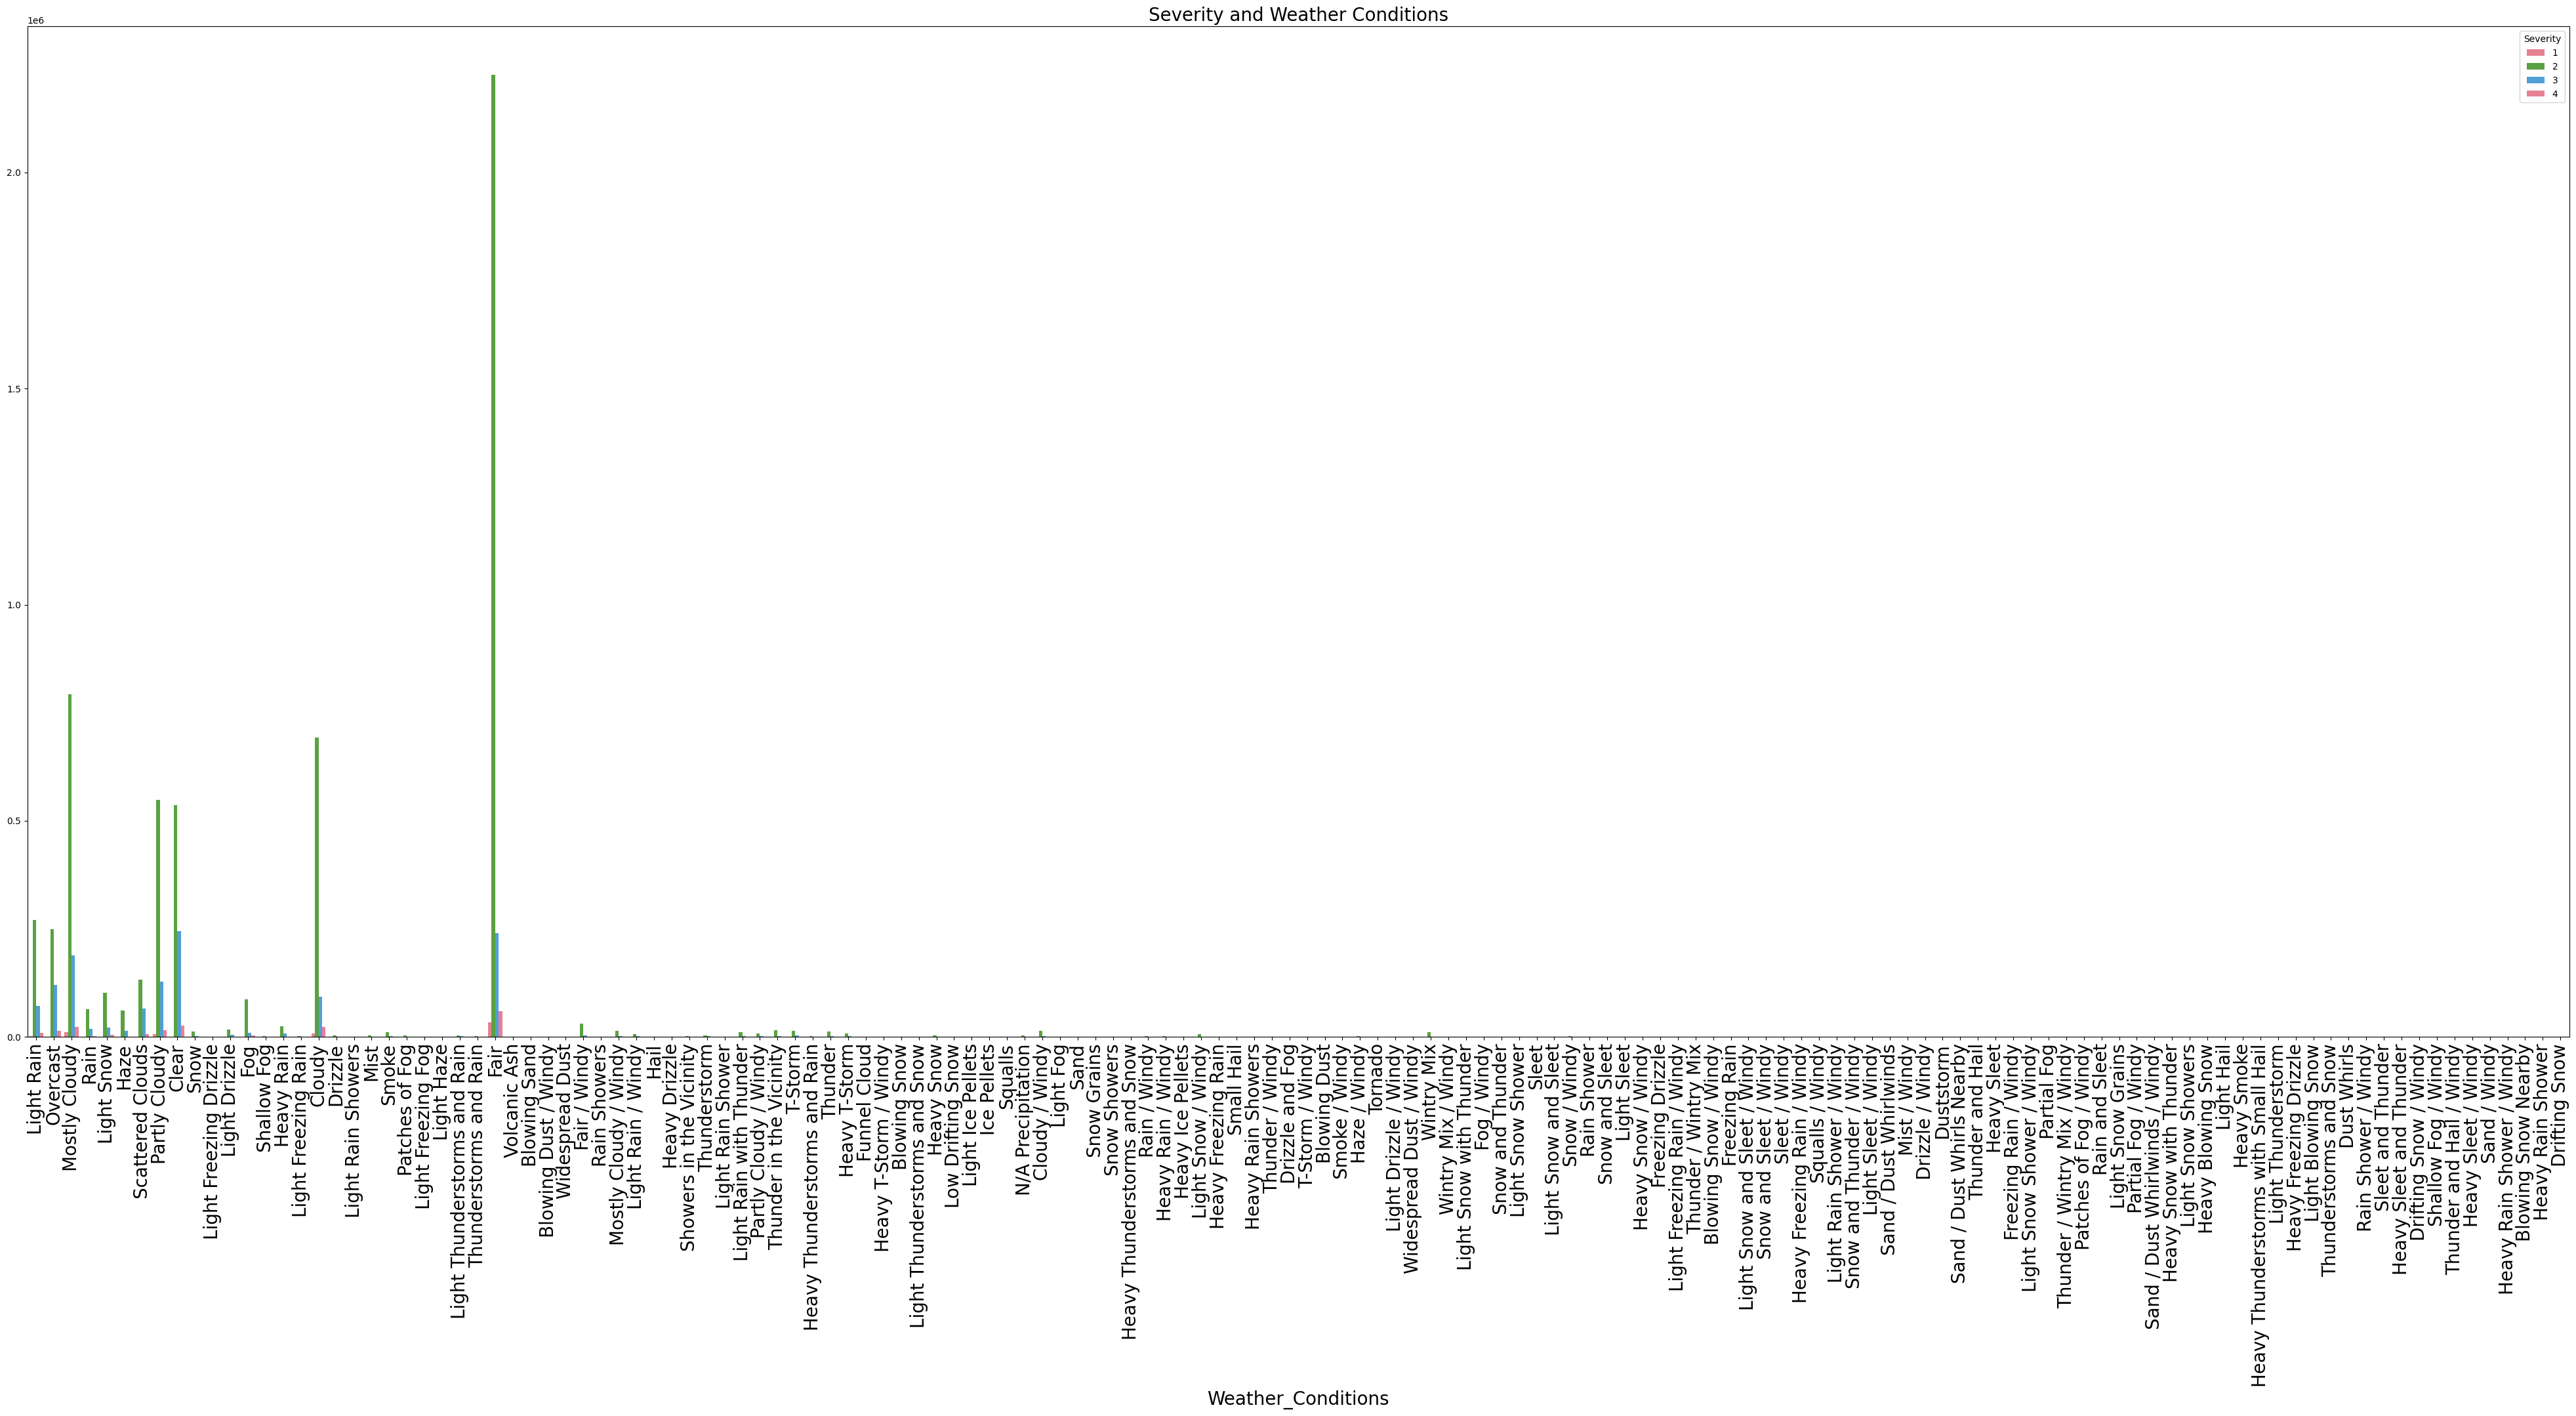

In [40]:
# Severity and Weather Conditions
# Double-Click to zome the chart
plt.figure(figsize=(50,20))
sns.countplot(data=data,x="Weather_Condition",hue="Severity",palette="husl")
plt.xticks(rotation=90,size=20)
plt.xlabel("Weather_Conditions",size=20)
plt.ylabel(None)
plt.title("Severity and Weather Conditions",size=20)
plt.show()

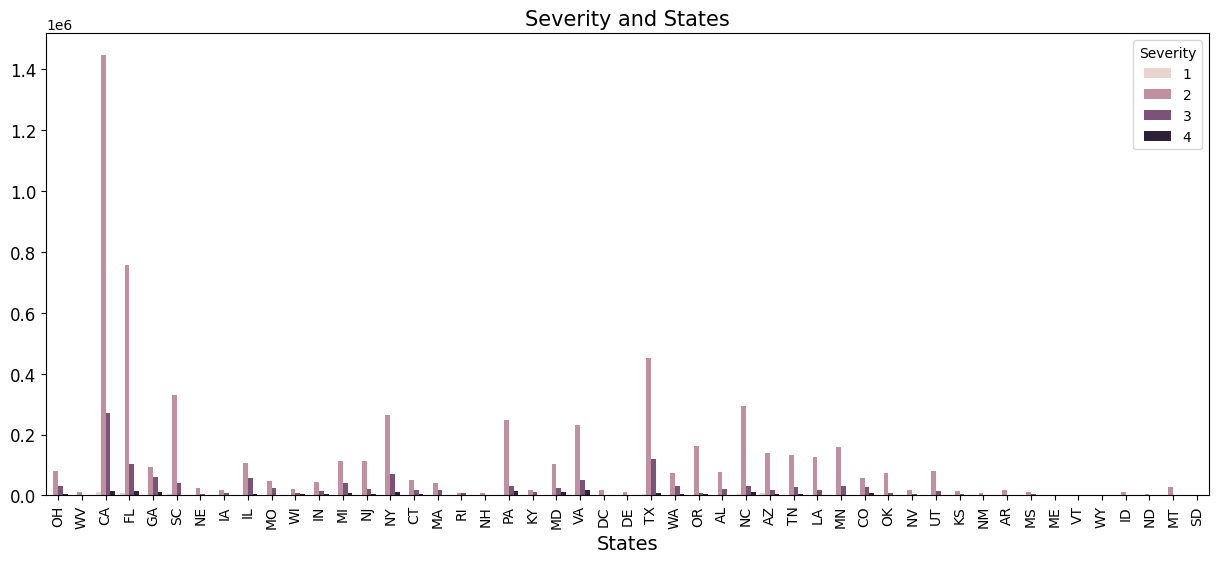

In [41]:
# Severity and States
plt.figure(figsize=(15,6))
sns.countplot(data=data,x="State",hue="Severity")
plt.xticks(rotation=90,size=10)
plt.yticks(size=12)
plt.ylabel(None)
plt.xlabel("States",size=14)
plt.title("Severity and States",size=15)
plt.show()

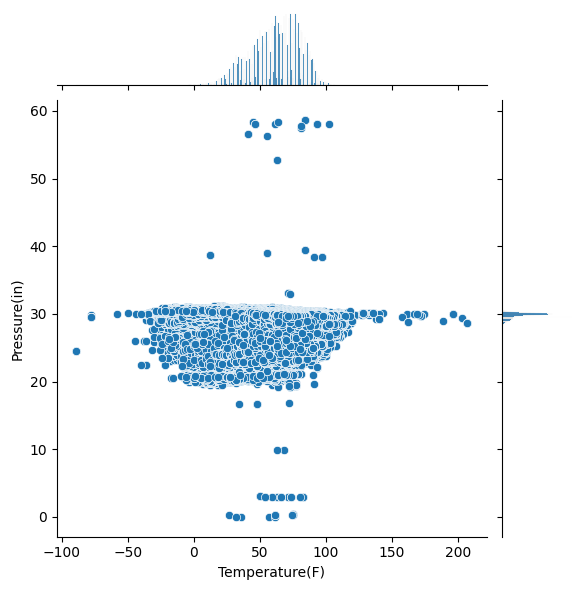

In [42]:
# Temperature and Pressure...
columns=data[["Temperature(F)","Pressure(in)"]]
plot_data=columns[columns.notnull().all(axis=1)]
sns.jointplot(data=plot_data,x="Temperature(F)",y="Pressure(in)")
plt.show()

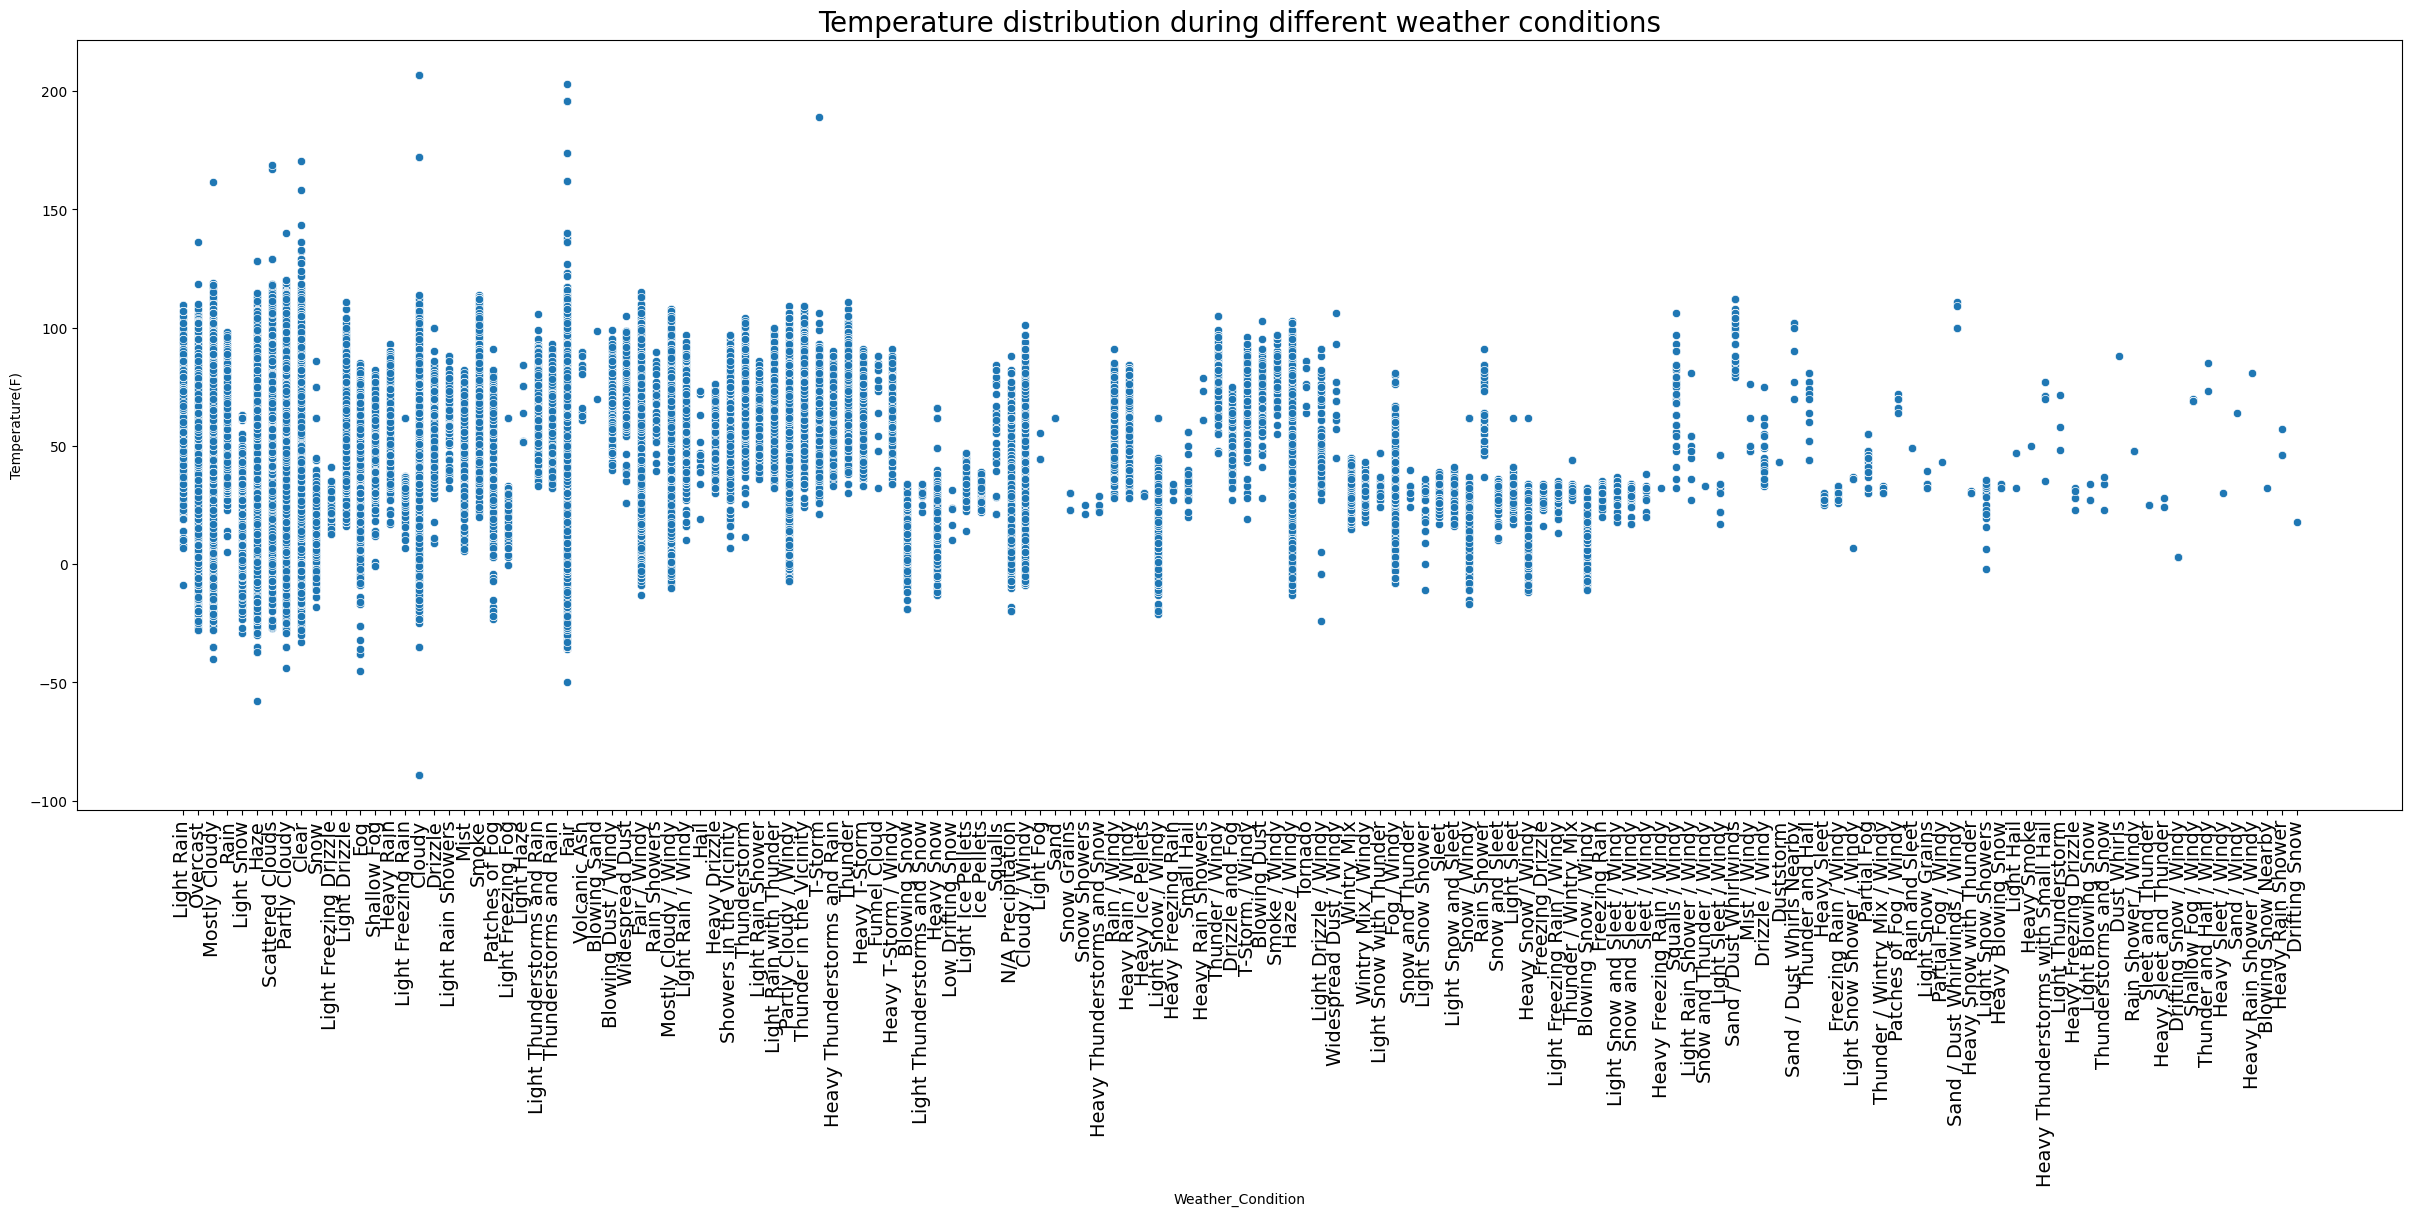

In [43]:
#Temperature distribution during different weather conditions
sns.scatterplot(data,x="Weather_Condition",y="Temperature(F)")
fig = plt.gcf()
fig.set_size_inches(30,10)
plt.xticks(rotation=90,size=14)
plt.title("Temperature distribution during different weather conditions",size=20)
plt.show()

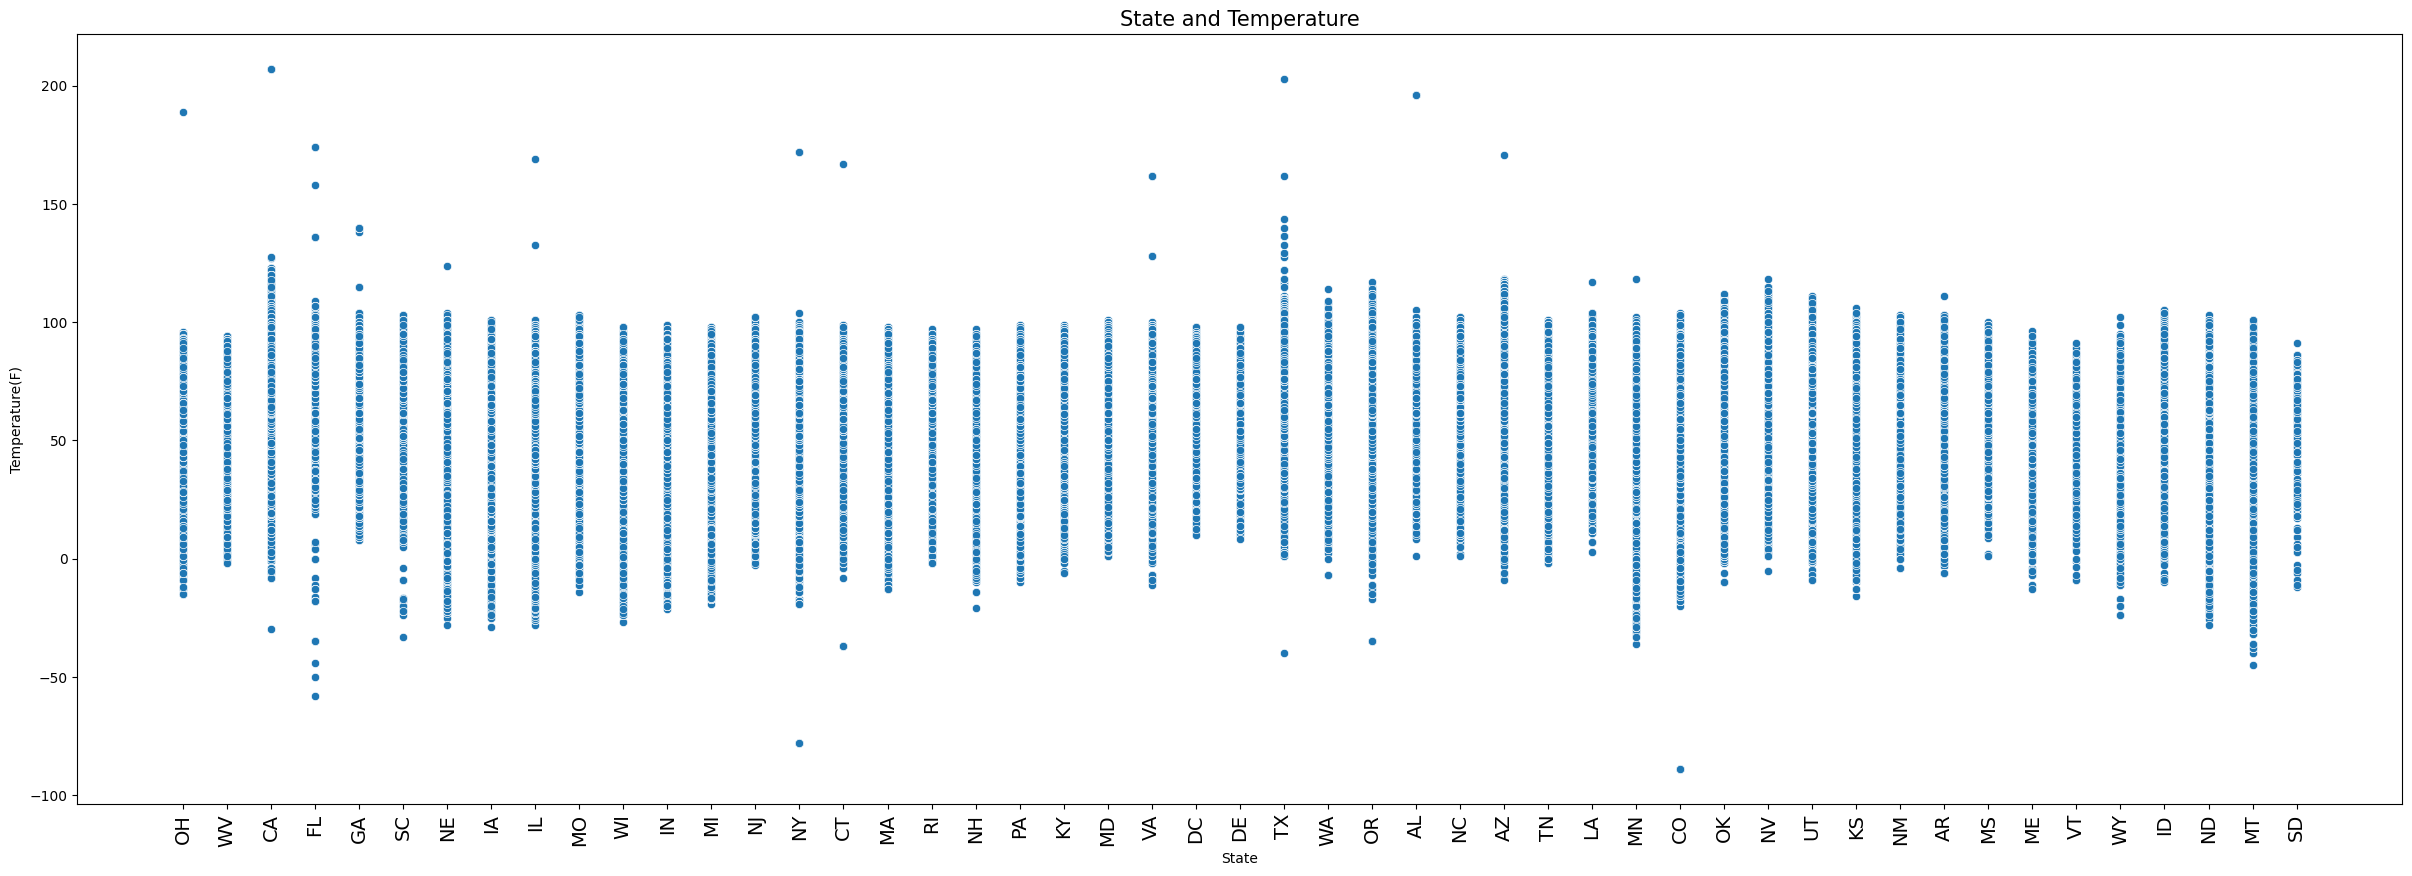

In [44]:
# State and Temperature
sns.scatterplot(data,x="State",y="Temperature(F)")
fig = plt.gcf()
fig.set_size_inches(30,10)
plt.xticks(rotation=90,size=14)
plt.title("State and Temperature",size=15)
plt.show()

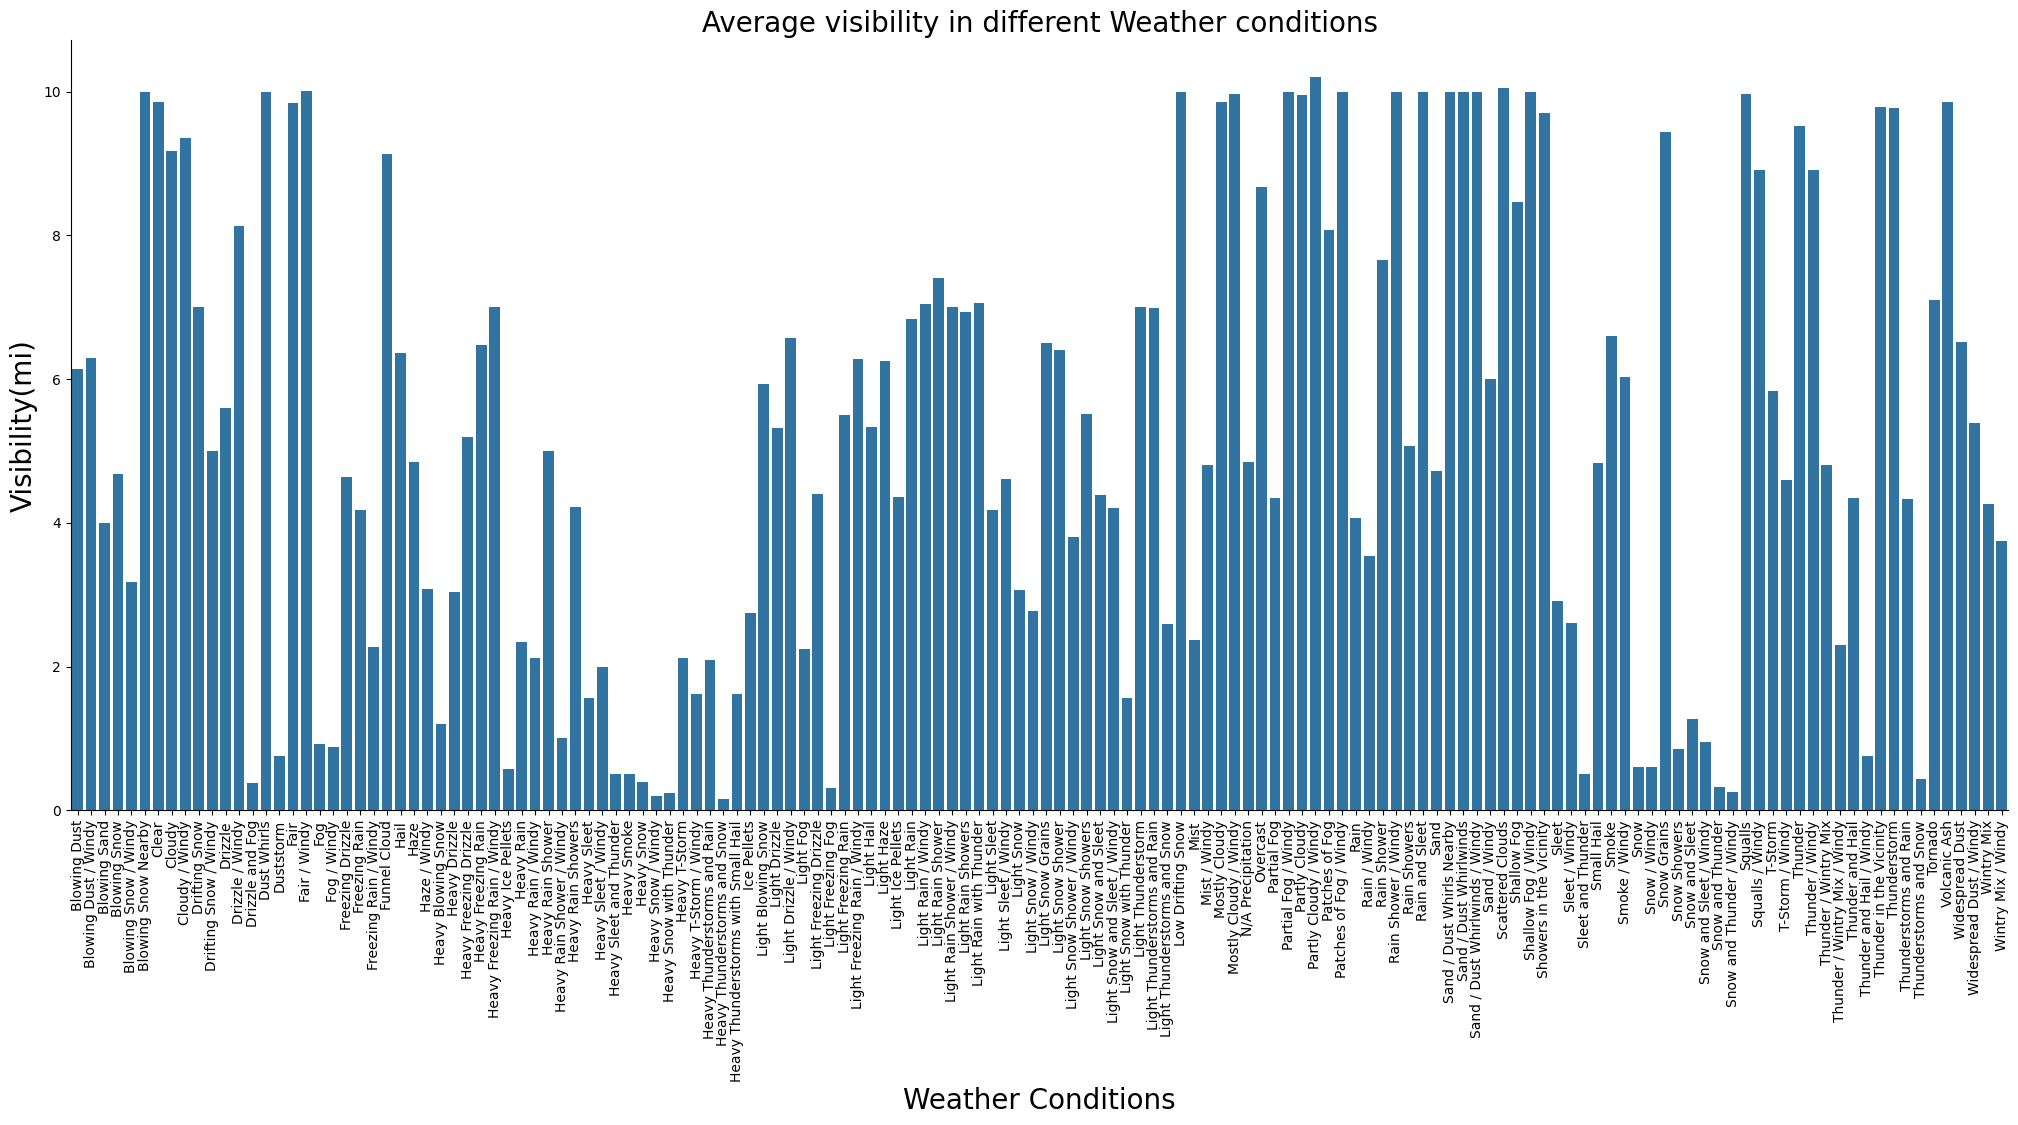

In [45]:
# Average visibility in different Weather conditions
# Double-Click to zoom the chart
plt.figure(figsize=(25,10))
avg_visibility=data.groupby('Weather_Condition')['Visibility(mi)'].mean()
sns.barplot(x=avg_visibility.index,y=avg_visibility)
sns.despine(right=True)
plt.title("Average visibility in different Weather conditions",size=20)
plt.ylabel("Visibility(mi)",size=20)
plt.xlabel("Weather Conditions",size=20)
plt.xticks(rotation=90)
plt.show()

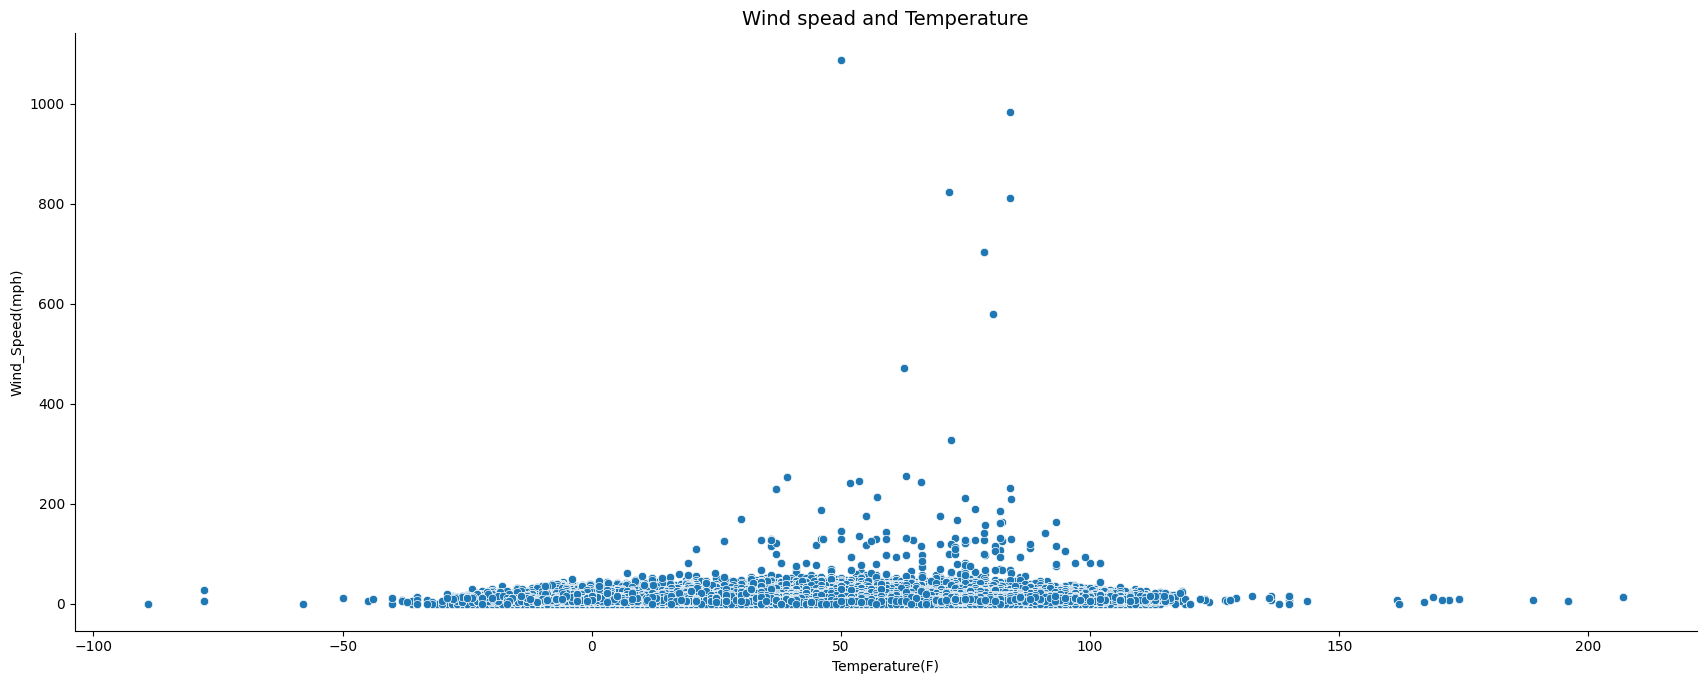

In [5]:
# Wind spead and Temperature
sns.relplot(data,x="Temperature(F)",y="Wind_Speed(mph)")
plt.title("Wind spead and Temperature",size=14)
fig=plt.gcf()
fig.set_size_inches(20,7)
plt.show()

# MULTIVARIAT ANALYSIS

In [6]:
# State vs Weather condition and average Temperature...
cols=data[["State","Weather_Condition","Temperature(F)"]]
not_null_data=cols[cols.notnull().all(axis=1)]
#not_null_data
pivot_table=not_null_data.pivot_table(index="State",columns="Weather_Condition",values="Temperature(F)",aggfunc='mean')
pivot_table

Weather_Condition,Blowing Dust,Blowing Dust / Windy,Blowing Sand,Blowing Snow,Blowing Snow / Windy,Blowing Snow Nearby,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drifting Snow / Windy,Drizzle,Drizzle / Windy,Drizzle and Fog,Dust Whirls,Duststorm,Fair,Fair / Windy,Fog,Fog / Windy,Freezing Drizzle,Freezing Rain,Freezing Rain / Windy,Funnel Cloud,Hail,Haze,Haze / Windy,Heavy Blowing Snow,Heavy Drizzle,Heavy Freezing Drizzle,Heavy Freezing Rain,Heavy Freezing Rain / Windy,Heavy Ice Pellets,Heavy Rain,Heavy Rain / Windy,Heavy Rain Shower,Heavy Rain Shower / Windy,Heavy Rain Showers,Heavy Sleet,Heavy Sleet / Windy,Heavy Sleet and Thunder,Heavy Smoke,Heavy Snow,Heavy Snow / Windy,Heavy Snow with Thunder,Heavy T-Storm,Heavy T-Storm / Windy,Heavy Thunderstorms and Rain,Heavy Thunderstorms and Snow,Heavy Thunderstorms with Small Hail,Ice Pellets,Light Blowing Snow,Light Drizzle,Light Drizzle / Windy,Light Fog,Light Freezing Drizzle,Light Freezing Fog,Light Freezing Rain,Light Freezing Rain / Windy,Light Hail,Light Haze,Light Ice Pellets,Light Rain,Light Rain / Windy,Light Rain Shower,Light Rain Shower / Windy,Light Rain Showers,Light Rain with Thunder,Light Sleet,Light Sleet / Windy,Light Snow,Light Snow / Windy,Light Snow Grains,Light Snow Shower,Light Snow Shower / Windy,Light Snow Showers,Light Snow and Sleet,Light Snow and Sleet / Windy,Light Snow with Thunder,Light Thunderstorm,Light Thunderstorms and Rain,Light Thunderstorms and Snow,Low Drifting Snow,Mist,Mist / Windy,Mostly Cloudy,Mostly Cloudy / Windy,N/A Precipitation,Overcast,Partial Fog,Partial Fog / Windy,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Patches of Fog / Windy,Rain,Rain / Windy,Rain Shower,Rain Shower / Windy,Rain Showers,Rain and Sleet,Sand / Dust Whirls Nearby,Sand / Dust Whirlwinds,Sand / Dust Whirlwinds / Windy,Sand / Windy,Scattered Clouds,Shallow Fog,Shallow Fog / Windy,Showers in the Vicinity,Sleet,Sleet / Windy,Sleet and Thunder,Small Hail,Smoke,Smoke / Windy,Snow,Snow / Windy,Snow Grains,Snow Showers,Snow and Sleet,Snow and Sleet / Windy,Snow and Thunder,Snow and Thunder / Windy,Squalls,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder / Wintry Mix,Thunder / Wintry Mix / Windy,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Volcanic Ash,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AL,NaN,NaN,NaN,33.000000,NaN,NaN,61.127670,61.873910,60.578313,NaN,NaN,60.240000,NaN,56.333333,NaN,NaN,66.341357,65.575758,57.102600,69.750000,34.000000,31.000000,NaN,NaN,NaN,69.023592,NaN,NaN,59.333333,NaN,NaN,NaN,NaN,64.660750,72.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.340000,NaN,NaN,69.356347,70.361111,71.200000,NaN,NaN,NaN,NaN,63.989784,NaN,NaN,25.025000,27.042857,30.000000,NaN,NaN,NaN,NaN,63.147213,69.136364,NaN,NaN,NaN,72.498681,NaN,NaN,31.105882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.656075,NaN,NaN,53.021154,NaN,72.559415,71.720930,41.750000,59.391660,NaN,NaN,74.737603,70.950000,65.641176,NaN,62.139987,67.058824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.578795,61.700000,NaN,84.000000,NaN,NaN,NaN,NaN,58.180000,NaN,32.066667,NaN,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,69.545455,72.928571,79.294574,73.909091,NaN,NaN,NaN,NaN,80.578529,82.682576,70.450000,NaN,NaN,NaN,88.000000,NaN,32.000000,NaN
AR,NaN,NaN,NaN,NaN,8.000000,NaN,59.244051,52.051100,53.863636,NaN,NaN,32.000000,NaN,52.000000,NaN,NaN,62.602920,53.571429,48.920370,NaN,28.000000,32.000000,NaN,NaN,19.000000,63.396512,35.000000,NaN,NaN,28.0,27.000000,NaN,NaN,63.450920,65.600000,NaN,NaN,NaN,NaN,NaN,24.0,NaN,31.071429,NaN,NaN,64.051724,63.714286,43.600000,NaN,NaN,NaN,NaN,51.507547,NaN,NaN,30.277778,NaN,27.707143,31.000000,NaN,NaN,NaN,58.307793,59.129032,NaN,NaN,NaN,65.904459,28.428571,NaN,24.308300,24.736842,NaN,NaN,NaN,NaN,25.666667,NaN,27.000000,Na

In [7]:
num_cols=data.select_dtypes(include="number").columns.tolist()
num_cols

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [8]:
# State vs Weather condition and average Temperature...
cols=data[["State","Weather_Condition","Temperature(F)"]]
not_null_data=cols[cols.notnull().all(axis=1)]
#not_null_data
pivot_table=not_null_data.pivot_table(index="State",columns="Weather_Condition",values="Temperature(F)",aggfunc='mean').fillna(0)
pivot_table

Weather_Condition,Blowing Dust,Blowing Dust / Windy,Blowing Sand,Blowing Snow,Blowing Snow / Windy,Blowing Snow Nearby,Clear,Cloudy,Cloudy / Windy,Drifting Snow,Drifting Snow / Windy,Drizzle,Drizzle / Windy,Drizzle and Fog,Dust Whirls,Duststorm,Fair,Fair / Windy,Fog,Fog / Windy,Freezing Drizzle,Freezing Rain,Freezing Rain / Windy,Funnel Cloud,Hail,Haze,Haze / Windy,Heavy Blowing Snow,Heavy Drizzle,Heavy Freezing Drizzle,Heavy Freezing Rain,Heavy Freezing Rain / Windy,Heavy Ice Pellets,Heavy Rain,Heavy Rain / Windy,Heavy Rain Shower,Heavy Rain Shower / Windy,Heavy Rain Showers,Heavy Sleet,Heavy Sleet / Windy,Heavy Sleet and Thunder,Heavy Smoke,Heavy Snow,Heavy Snow / Windy,Heavy Snow with Thunder,Heavy T-Storm,Heavy T-Storm / Windy,Heavy Thunderstorms and Rain,Heavy Thunderstorms and Snow,Heavy Thunderstorms with Small Hail,Ice Pellets,Light Blowing Snow,Light Drizzle,Light Drizzle / Windy,Light Fog,Light Freezing Drizzle,Light Freezing Fog,Light Freezing Rain,Light Freezing Rain / Windy,Light Hail,Light Haze,Light Ice Pellets,Light Rain,Light Rain / Windy,Light Rain Shower,Light Rain Shower / Windy,Light Rain Showers,Light Rain with Thunder,Light Sleet,Light Sleet / Windy,Light Snow,Light Snow / Windy,Light Snow Grains,Light Snow Shower,Light Snow Shower / Windy,Light Snow Showers,Light Snow and Sleet,Light Snow and Sleet / Windy,Light Snow with Thunder,Light Thunderstorm,Light Thunderstorms and Rain,Light Thunderstorms and Snow,Low Drifting Snow,Mist,Mist / Windy,Mostly Cloudy,Mostly Cloudy / Windy,N/A Precipitation,Overcast,Partial Fog,Partial Fog / Windy,Partly Cloudy,Partly Cloudy / Windy,Patches of Fog,Patches of Fog / Windy,Rain,Rain / Windy,Rain Shower,Rain Shower / Windy,Rain Showers,Rain and Sleet,Sand / Dust Whirls Nearby,Sand / Dust Whirlwinds,Sand / Dust Whirlwinds / Windy,Sand / Windy,Scattered Clouds,Shallow Fog,Shallow Fog / Windy,Showers in the Vicinity,Sleet,Sleet / Windy,Sleet and Thunder,Small Hail,Smoke,Smoke / Windy,Snow,Snow / Windy,Snow Grains,Snow Showers,Snow and Sleet,Snow and Sleet / Windy,Snow and Thunder,Snow and Thunder / Windy,Squalls,Squalls / Windy,T-Storm,T-Storm / Windy,Thunder,Thunder / Windy,Thunder / Wintry Mix,Thunder / Wintry Mix / Windy,Thunder and Hail,Thunder and Hail / Windy,Thunder in the Vicinity,Thunderstorm,Thunderstorms and Rain,Thunderstorms and Snow,Tornado,Volcanic Ash,Widespread Dust,Widespread Dust / Windy,Wintry Mix,Wintry Mix / Windy
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AL,0.000000,0.000000,0.0,33.000000,0.000000,0.0,61.127670,61.873910,60.578313,0.0,0.0,60.240000,0.000000,56.333333,0.0,0.0,66.341357,65.575758,57.102600,69.750000,34.000000,31.000000,0.000000,0.000000,0.000000,69.023592,0.000000,0.0,59.333333,0.0,0.000000,0.0,0.000000,64.660750,72.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,30.340000,0.000000,0.0,69.356347,70.361111,71.200000,0.0,0.000000,0.000000,0.000000,63.989784,0.000000,0.0,25.025000,27.042857,30.000000,0.000000,0.0,0.000000,0.000000,63.147213,69.136364,0.000000,0.0,0.000000,72.498681,0.000000,0.0,31.105882,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,75.656075,0.000000,0.00,53.021154,0.000000,72.559415,71.720930,41.750000,59.391660,0.000000,0.0,74.737603,70.950000,65.641176,0.000000,62.139987,67.058824,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.578795,61.700000,0.000000,84.000000,0.000000,0.000000,0.0,0.000000,58.180000,0.000000,32.066667,0.000000,0.0,0.0,31.000000,0.000000,0.0,0.0,0.000000,0.000000,69.545455,72.928571,79.294574,73.909091,0.000000,0.0,0.000000,0.0,80.578529,82.682576,70.450000,0.0,0.0,0.000000,88.000000,0.000000,32.000000,0.000000
AR,0.000000,0.000000,0.0,0.000000,8.000000,0.0,59.244051,52.051100,53.863636,0.0,0.0,32.000000,0.000000,52.000000,0.0,0.0,62.602920,53.571429,48.920370,0.000000,28.000000,32.000000,0.000000,0.000000,19.000000,63.396512,35.000000,0.0,0.000000,28.0,27.000000,0.0,0.00000

In [9]:
num_data=data[['Severity',
'Start_Lat',
'Start_Lng',
'Distance(mi)',
'Temperature(F)',
'Wind_Chill(F)',
'Humidity(%)',
'Pressure(in)',
'Visibility(mi)',
'Wind_Speed(mph)',
'Precipitation(in)',
'Year',
'Month',
'Day',
'Hour',
'Minute',
'Second']]
plt.figure(figsize=(8,6)) # Adjust the figure size if needed
correlation_matrix=num_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix for numeric columns")
plt.show()

KeyError: "['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'] not in index"